In [1]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Data Processing and Preparation

In [2]:
credit = pd.read_csv('Resources/credit-approval_csv.csv')
credit.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
#get summary of numeric columns
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [4]:
# Replace "?" with NaN
credit.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
credit["Age"] = pd.to_numeric(credit["Age"])
# credit_copy = credit[:,:]
credit_copy = credit.copy()

In [5]:
#replace missing values with mean values of numeric columns
credit.fillna(credit.mean(), inplace=True)

In [6]:
#check the newly modified data
credit.tail()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [7]:
#convert to categorical data to dummy data
data_binary_encoded = pd.get_dummies(credit_copy, columns=["Gender", "Married", "BankCustomer","EducationLevel","Ethnicity","PriorDefault", "Employed", "DriversLicense","Citizen","Approved"])
data_binary_encoded.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Gender_a,Gender_b,Married_l,Married_u,...,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s,Approved_+,Approved_-
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0


In [8]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [9]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in credit:
    if credit[col].dtypes=='object':
        credit[col]=LE.fit_transform(credit[col])

In [10]:
credit.tail()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1
689,1,35.00,3.375,1,0,1,3,8.29,0,0,0,1,0,0.0,0,1


## 2. Data Modelling 

In [11]:
from sklearn.model_selection import train_test_split
# remove irrelevant features
credit = credit.drop(['DriversLicense', 'ZipCode'], axis=1)
credit = credit.values

In [12]:
# Creating new variable to input features and labels
X,y = credit[:,0:13] , credit[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=42)

In [13]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [14]:
scaledX = scaler.transform(X)

In [15]:
#decision trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [16]:
#model accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7898550724637681


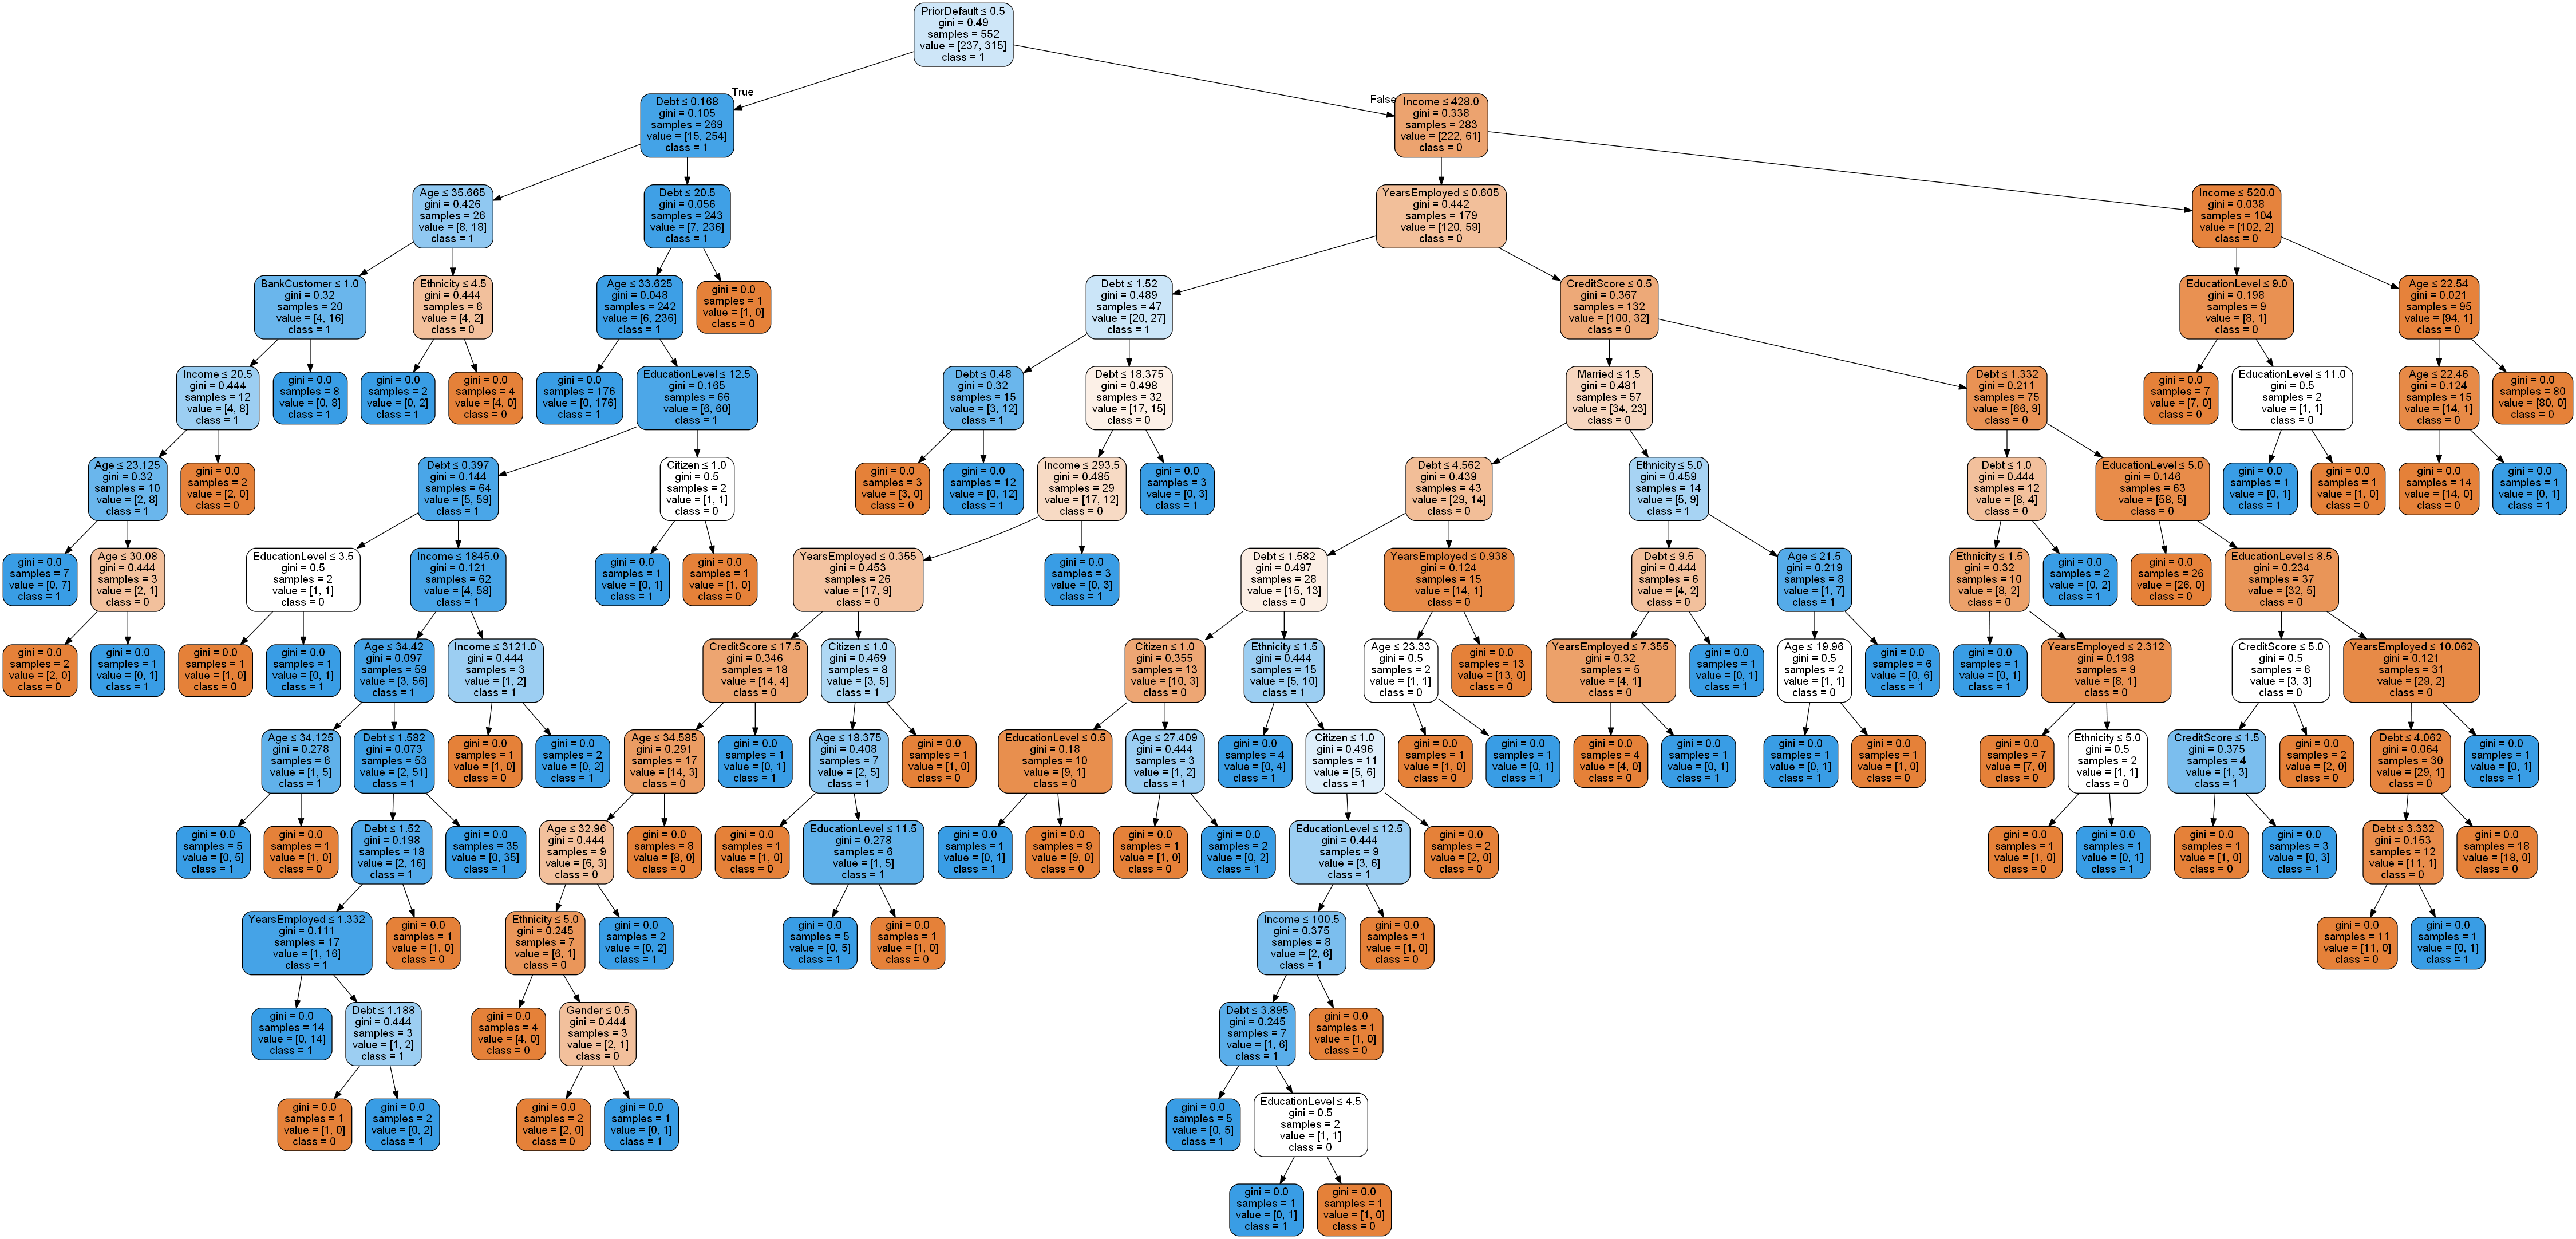

In [17]:
#graphing the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import display, Image
import pydotplus

feature_cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','Citizen','Income']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled=True, rounded=True,
               special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit.png')
Image(graph.create_png())